In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


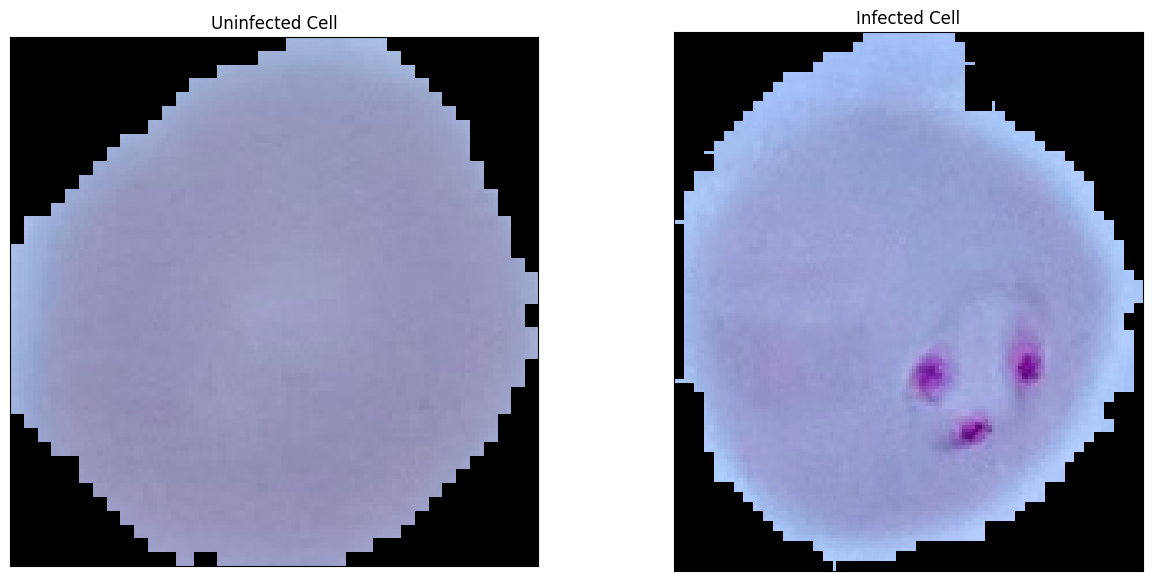

In [3]:
upic='/content/drive/MyDrive/Malaria_Dataset/archive/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'
apic='/content/drive/MyDrive/Malaria_Dataset/archive/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [4]:
width = 128
height = 128

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [7]:
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/Malaria_Dataset/archive/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [8]:
valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/Malaria_Dataset/archive/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [9]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [17]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

In [16]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs = 1,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

<ipython-input-16-de3f08436445>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,


1378/1378 [==============================] - 8136s 6s/step - loss: 0.2980 - accuracy: 0.8892 - val_loss: 0.1981 - val_accuracy: 0.9363


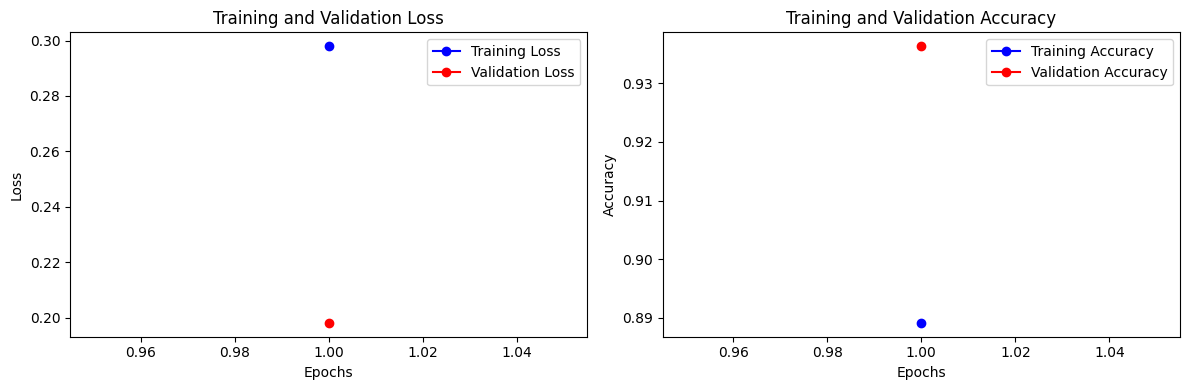

In [24]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the 'history' object

# Extract loss and accuracy history from the 'history' object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a range of epochs for the x-axis
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [25]:
from tabulate import tabulate

In [26]:


# Assuming you have already trained your model and have the 'history' object

# Extract loss and accuracy history from the 'history' object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a table
table = [["Epoch", "Train Loss", "Val Loss", "Train Accuracy", "Val Accuracy"]]
for epoch in range(1, len(train_loss) + 1):
    table.append([epoch, train_loss[epoch - 1], val_loss[epoch - 1], train_acc[epoch - 1], val_acc[epoch - 1]])

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


╒═════════╤══════════════╤════════════╤══════════════════╤════════════════╕
│   Epoch │   Train Loss │   Val Loss │   Train Accuracy │   Val Accuracy │
╞═════════╪══════════════╪════════════╪══════════════════╪════════════════╡
│       1 │     0.297971 │   0.198081 │         0.889151 │       0.936298 │
╘═════════╧══════════════╧════════════╧══════════════════╧════════════════╛
